# Regresión

Ejemplo de regresión lineal<br>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Procesar datos

In [9]:
df = pd.read_csv("propiedades.csv")

In [10]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Unnamed: 0,Unnamed: 0.1,latitud,longitud,precio,m2,ambientes
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1048.000000,1044.000000
mean,524.500000,524.500000,-34.526132,-58.423896,35737.122857,62.232777,2.143678
std,303.253195,303.253195,2.549434,2.319076,49897.697379,56.281333,1.339870
min,0.000000,0.000000,-38.505290,-120.740135,27.000000,0.000000,0.000000
25%,262.250000,262.250000,-34.608908,-58.448631,16800.000000,35.000000,1.000000
50%,524.500000,524.500000,-34.594705,-58.423578,25000.000000,45.000000,2.000000
75%,786.750000,786.750000,-34.578902,-58.395060,39000.000000,70.000000,3.000000
max,1049.000000,1049.000000,47.751076,-34.588875,820000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.571429


In [11]:
df.head()

,Unnamed: 0,Unnamed: 0.1,latitud,longitud,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,0,-34.611270,-58.36378,Departamento-alquiler - Puerto Madero-situar,Apartamento,2900.0,USD,192.0,4.0
1,1,1,-34.589848,-58.50942,Oportunidad! Monoambiente A Estrenar - Alquile...,Apartamento,50.0,USD,38.0,1.0
2,2,2,-34.605970,-34.60597,Alquiler Temporario De Lujo 4/p Hospital Itali...,Apartamento,1866.0,COP,57.0,1.0
3,3,3,-34.590656,-58.44873,Excelente Departamento 3 Ambientes (2 Cuartos)...,Apartamento,30000.0,COP,60.0,3.0
4,4,4,-34.624084,-58.38989,Departamentos Alquil Temporario Centro Cap Fed...,Apartamento,2100.0,COP,64.0,3.0


In [12]:
# Sacamos todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre vacio
df_clean = df.copy()
df_clean.dropna(subset=['m2'], inplace=True)
df_clean.dropna(subset=['ambientes'], inplace=True)

# Otra manera de obtener el mismo resultado:
#df_clean = df[df['m2'].notna()]
#df_clean = df_clean[df_clean['ambientes'].notna()]

In [13]:
# ¿Cuántos datos quedaron para analizar?
# (filas, columnas)
df_clean.shape

(1044, 10)

## Fin de la limpieza
Se finalizó la limpieza sacando aquellas filas que no eran de interes, se puede observar que la cantidad de filas hasta el momento es menor a la cantidad de filas con la que se comnezó el análisis

In [14]:
print('Cantidad de datos en observacion:', df_clean.shape[0])

Cantidad de datos en observacion: 1044


# Explorar datos

In [15]:
df_clean.head()

,Unnamed: 0,Unnamed: 0.1,latitud,longitud,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,0,-34.611270,-58.36378,Departamento-alquiler - Puerto Madero-situar,Apartamento,2900.0,USD,192.0,4.0
1,1,1,-34.589848,-58.50942,Oportunidad! Monoambiente A Estrenar - Alquile...,Apartamento,50.0,USD,38.0,1.0
2,2,2,-34.605970,-34.60597,Alquiler Temporario De Lujo 4/p Hospital Itali...,Apartamento,1866.0,COP,57.0,1.0
3,3,3,-34.590656,-58.44873,Excelente Departamento 3 Ambientes (2 Cuartos)...,Apartamento,30000.0,COP,60.0,3.0
4,4,4,-34.624084,-58.38989,Departamentos Alquil Temporario Centro Cap Fed...,Apartamento,2100.0,COP,64.0,3.0


Se puede observar que hay alquileres en dolares, solo nos quedaremos con aquellos alquileres en pesos

In [16]:
# Filtramos el dataframe, solos nos quedamos con los alquileres en pesos
df_ars = df_clean[df_clean['moneda'] == 'COP']
print('Cantidad de datos en observacion:', df_ars.shape[0])

Cantidad de datos en observacion: 928


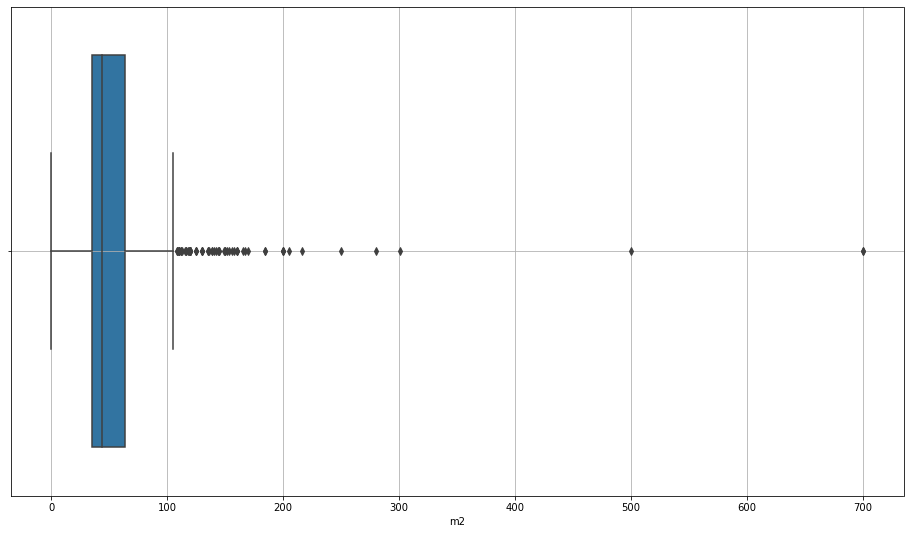

In [17]:
# Renderizamos el gráfico utilizando el diagrama de cajas
#df_ars.boxplot(column=['m2'])
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df_ars['m2'], ax=ax)
ax.grid('dashed')

Se puede observar que hay muchos alquileres "outliers", es decir que se escapan de la tendencia. Filtraremos aquellos que no aportan al análisis

In [18]:
# Nos quedamos solamente con los deparamentos menor a 200m2 y mayor a 50m2
# Utilizamos el concepto de "máscara" tal cual fue visto en Numpy
# para filtrar el dataframe de propiedads deseado
propiedades = df_ars[(df_ars['m2'] < 200) & (df_ars['m2'] > 50)]

In [19]:
print('Cantidad de datos en observacion:', propiedades.shape[0])

Cantidad de datos en observacion: 323


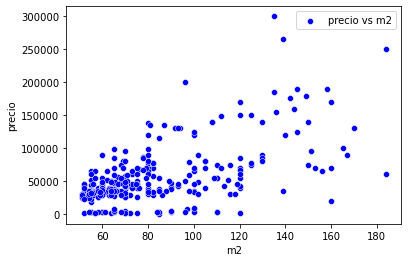

In [20]:
# Graficar la tendencia
sns.scatterplot(x=propiedades['m2'], y=propiedades['precio'], color='b', label='precio vs m2')
plt.show()

# Entrenar modelo

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [21]:
X = propiedades[['m2']].values
y = propiedades['precio'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [22]:
from sklearn.model_selection import train_test_split
# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ahora generaremos un modelo "base", el cual podremos utilizarlo para evaluar en la próxima instancia contra el modelo que construyamos con inteligencia artificial

In [23]:
# Creamos el modelo base
class MeanBaseModel():
    def __init__(self):
        self.W = 0

    def fit(self, X, y):
        self.W = np.mean(y / X)

    def predict(self, X):
        return X * self.W

In [24]:
# Entrenar nuestro modelo base (un promediador)
mean_model = MeanBaseModel()
mean_model.fit(X_train, y_train)
y_hat_base = mean_model.predict(X_test)
print(f"Precio del m2 promedio: ${mean_model.W:.2f}")

Precio del m2 promedio: $713.25


In [25]:
# Sino hubieramos utilizado el modelo generado, las líneas de código serían:
precio_m2 = y_train / X_train
promedio_precio_m2 = precio_m2.mean()
y_hat_base = X_test * promedio_precio_m2
print(f"Precio del m2 promedio: ${promedio_precio_m2:.2f}")

Precio del m2 promedio: $713.25


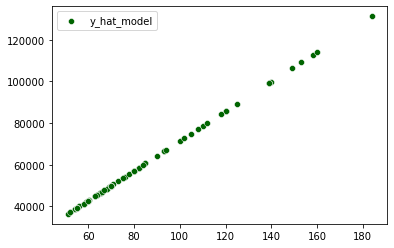

In [26]:
sns.scatterplot(x=X_test[:,0], y=y_hat_base[:,0], color='darkGreen', label='y_hat_model')
#plt.scatter(X_test, y_hat_base, color='darkGreen', label='y_hat_model')
plt.show()

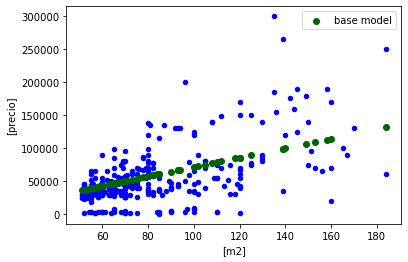

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
propiedades.plot.scatter(['m2'], ['precio'], color='b', ax=ax)
ax.scatter(X_test, y_hat_base, color='darkGreen', label="base model")
ax.legend()
plt.show()

Como se observa en el último gráfico, la línea verde aproxima bastante a la distribución de puntos azules, pero debería "apuntar" un poco más arriba. En el próximo encuentro discutiremos porque sucede este fenomeno

In [28]:
# Calcular los errores del modelo base
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Error promedio   MAE - Modelo Base:', mean_absolute_error(y_test, y_hat_base))
print('Error cuadrático MSE - Modelo Base:', mean_squared_error(y_test, y_hat_base))

Error promedio   MAE - Modelo Base: 24545.707558628514
Error cuadrático MSE - Modelo Base: 1320419545.8662236


Sin utilizar inteligencia artificial, unicamente con nuestro conocimientos sobre los datos y estadística hemos generado un primer modelo base competirá contra los algoritmos de inteligencia artificial que veremos en la siguiente etapa

#### Crear un modelo de regresión lineal simple para constrastar contra el modelo base

In [29]:
from sklearn import linear_model
# Calcular y visualizar le prediccion de costos por m2
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

# Validar modelo

In [30]:
from sklearn.metrics import r2_score
# En este caso, ya que se trata de una regresión lineal puedo relacinonar el
# índice R2 con el coeficiente de correlación lineal.
value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.40


Se obtuvo un índice de correlación del 40%, parece bajo, ¿será mejor el modelo base?

In [31]:
value = r2_score(y_test, y_hat_base)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.37


# Utilizar modelo

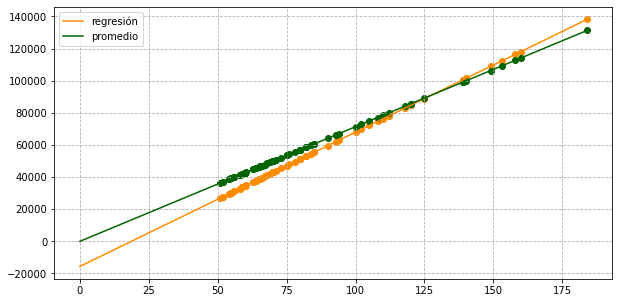

No handles with labels found to put in legend.


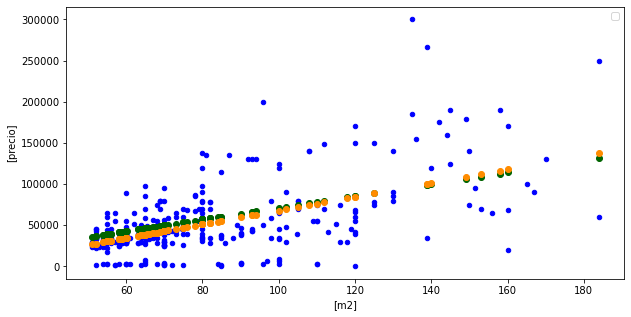

In [32]:
m1 = lr.coef_
b1 = lr.intercept_
lx1 = np.array([0, X_test.max()])
ly1 = lx1 * m1 + b1

m2 = promedio_precio_m2
b2 = 0
lx2 = np.array([0, X_test.max()])
ly2 = lx2 * m2 + b2

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.scatter(X_test, y_hat, color='darkOrange')
ax.plot(lx1, ly1, color='darkOrange', label='regresión')
ax.scatter(X_test, y_hat_base, color='darkGreen')
ax.plot(lx2, ly2, color='darkGreen', label='promedio')
ax.grid(ls='dashed')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
propiedades.plot.scatter(['m2'], ['precio'], color='b', ax=ax)
ax.scatter(X_test, y_hat_base, color='darkGreen')
ax.scatter(X_test, y_hat, color='darkOrange')
ax.legend()
plt.show()

In [33]:
# Calcular los errores del modelo base
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Error promedio - Regresion Lineal:', mean_absolute_error(y_test, y_hat))
print('Error promedio - Modelo Base:', mean_absolute_error(y_test, y_hat_base))
print('')
print('Error MSE - Regresion Lineal:', mean_squared_error(y_test, y_hat))
print('Error MSE - Modelo Base:', mean_squared_error(y_test, y_hat_base))

Error promedio - Regresion Lineal: 22903.7634170032
Error promedio - Modelo Base: 24545.707558628514

Error MSE - Regresion Lineal: 1265841661.6111314
Error MSE - Modelo Base: 1320419545.8662236


# Conclusión

Con esto concluye el trabajo que se realizará sobre el dataset de "propiedades". El mejor resultado que se obtuvo fue un ajuste del 40% utilizando una regresión lineal simple.<br>
Aunque ese resultado super al modelo base, se puede seguir trabajando agregando más entradas al modelo (multilineal) o mejorando la clasificación de propiedades antes de someterlas a la regresión lineal.<br>
Queda en la voluntad del alumno seguir trabajando, puede ser parte de su proyecto final.